<a href="https://colab.research.google.com/github/slaninam/MCDA/blob/master/exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Eploration of crowdsourced measurement data

with map display of relevant values

### Prepare data

Download statistics file from an RMBT server, unzip and read into a data frame.

In [54]:
import pandas as pd
import urllib.request
import zipfile

from pathlib import Path

datafile = Path('data.zip')

# Download data file from the RMBT server (RTR or CTU)
# TODO: Specify range of times to process, make source adjustable or merge
if not datafile.exists():
  print('Retrieving data file')
  url = 'https://m-cloud.netztest.at/RMBTStatisticServer/export/netztest-opendata-2019-09.zip'
  #url = 'https://control.netmetr.cz/RMBTStatisticServer/export/NetMetr-opendata-2019-09.zip'
  urllib.request.urlretrieve(url, 'data.zip')

# Extract the data archive and read into a data frame
with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('')
df = pd.read_csv('netztest-opendata-2019-09.csv')

# Print out the length of the data frame and the list of columns
print(len(df))
print(sorted(list(df)))

266947
['asn', 'cat_technology', 'cell_area_code', 'cell_location_id', 'channel_number', 'client_version', 'country_location', 'download_kbit', 'dtm_level', 'edge_id', 'gkz', 'gkz_sa', 'implausible', 'ip_anonym', 'kg_nr', 'land_cover', 'lat', 'link_distance', 'link_frc', 'link_id', 'link_name', 'loc_accuracy', 'loc_src', 'long', 'lte_rsrp', 'lte_rsrq', 'model', 'nat_type', 'ndt_download_kbit', 'ndt_upload_kbit', 'network_mcc_mnc', 'network_name', 'network_type', 'num_threads', 'open_test_uuid', 'open_uuid', 'ping_ms', 'pinned', 'platform', 'radio_band', 'server_name', 'settlement_type', 'signal_classification', 'signal_strength', 'sim_mcc_mnc', 'test_duration', 'time_utc', 'upload_kbit', 'zip_code']


### Display selected data on map

The data to be displayed can be filtered according to different values. Also the displayed quantity (dot colour) can be selected by modifying the *column* parameter in the plot command



In [0]:
# Install geopandas and contextily for map display
!pip install geopandas
!pip install contextily==1.0rc2

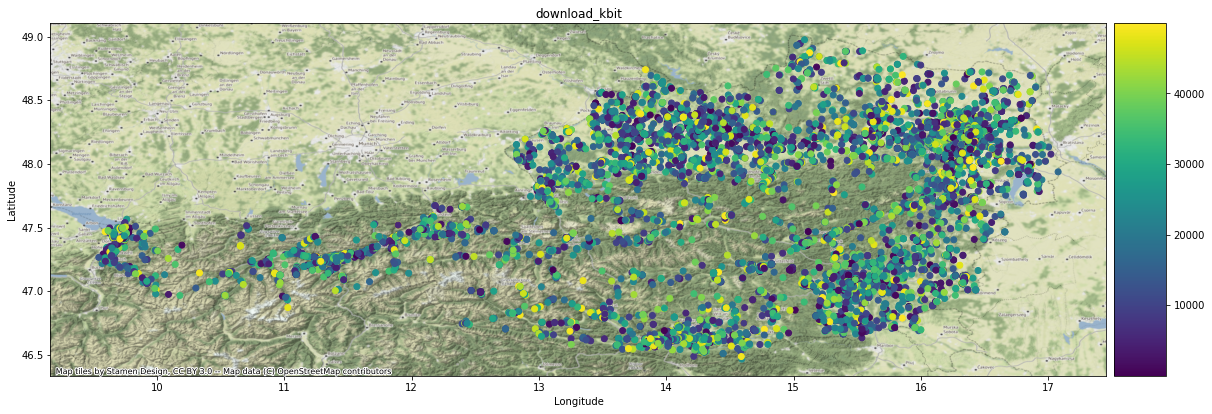

In [61]:
import geopandas
import matplotlib.pyplot as mpl
import contextily as ctx
from shapely.geometry import Point
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Filter which data shall be displayed, print the size of the sample
lte = df[df['network_type'] == 'LTE'] 
lte = lte[lte['country_location'] == 'AT']
lte = lte[lte['download_kbit'] < 50000] 
what_to_display = 'download_kbit'

# Prepare axes for legend
fig,ax = plt.subplots(1,1,figsize = (20,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)

# Prepare data
crs={'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(lte['long'], lte['lat'])]
geo_df = geopandas.GeoDataFrame(lte, crs = crs, geometry = geometry)

# Plot data and backrgound map
geo_df.plot(ax=ax, cax=cax, column=what_to_display, legend='True')
ax.set_title(what_to_display)
ax.xaxis.set_label_text('Longitude')
ax.yaxis.set_label_text('Latitude')
ctx.add_basemap(ax, crs=geo_df.crs)

### Get detailed statistics for a specific entry 

https://www.netztest.at/en/OpenDataSpecification.html

In [76]:
open_test_uuid = lte['open_test_uuid'].iloc[0]
print(open_test_uuid)

url = 'https://www.netztest.at/opendata/opentests/open-test-uuid?open-test-uuid=' + open_test_uuid
print(url)
url = 'https://www.netztest.at/opendata/opentests/search?lat=>48.09&lat=<48.35&long=>16.14&long=<16.62&loc_accuracy=>0&loc_accuracy=<2000&max_results=10'
print(url)

Oe2ae1c19-f2f5-441b-af72-3bb223f4c1bd
https://www.netztest.at/opendata/opentests/open-test-uuid?open-test-uuid=Oe2ae1c19-f2f5-441b-af72-3bb223f4c1bd
https://www.netztest.at/opendata/opentests/search?lat=>48.09&lat=<48.35&long=>16.14&long=<16.62&loc_accuracy=>0&loc_accuracy=<2000&max_results=10
